In [23]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import stattools


In [2]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self. variableType = ""
        self.low = a
        self.high = b
        
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, size=numberOfSamples)
        return samples

(array([1948., 1988., 1992., 2035., 2037.,    0.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

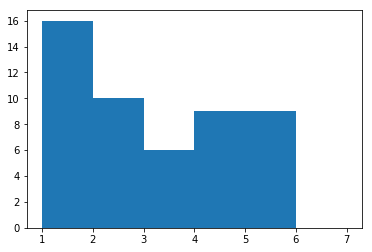

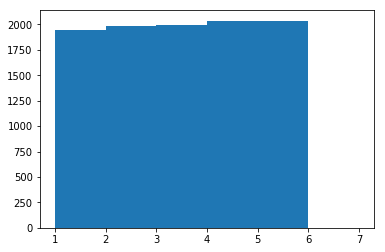

In [3]:
DieRolls = DiscreteRandomVariable(1,6)
_,ax1 = plt.subplots()
_,ax2 = plt.subplots()
ax1.hist(DieRolls.draw(50), bins = [1,2,3,4,5,6,7], align='mid')
ax2.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align='mid')

In [4]:
class BinomialRandomVariable:
    def __init__(self, numberOfTrials=10, probabilityOfSuccess=0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

(array([ 320., 1509., 3143., 3156., 1584.,  288.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

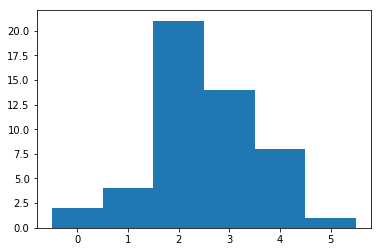

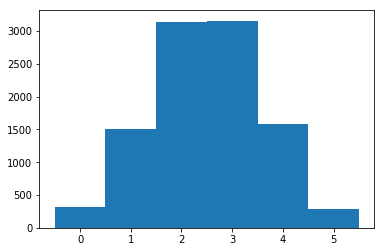

In [5]:
StockProbabilities = BinomialRandomVariable(5, 0.5)
_,ax1 = plt.subplots()
ax1.hist(StockProbabilities.draw(50), bins = [0,1,2,3,4,5,6], align='left')
_,ax2 = plt.subplots()
ax2.hist(StockProbabilities.draw(10000), bins = [0,1,2,3,4,5,6], align='left')

(array([2438., 3925., 2636.,  865.,  130.,    6.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

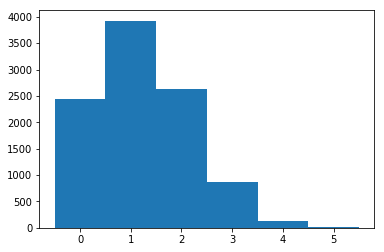

In [6]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
_,ax1 = plt.subplots()
ax1.hist(StockProbabilities.draw(10000), bins = [0,1,2,3,4,5,6], align='left')

In [7]:
class ContinuousRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = 'ContinousRandom'
        self.low = a
        self.high = b
        
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

(array([ 976., 1002., 1010., 1020.,  973.,  972., 1025., 1005., 1011.,
        1006.]),
 array([2.17754601e-03, 8.01931570e-01, 1.60168559e+00, 2.40143962e+00,
        3.20119364e+00, 4.00094767e+00, 4.80070169e+00, 5.60045572e+00,
        6.40020974e+00, 7.19996377e+00, 7.99971779e+00]),
 <a list of 10 Patch objects>)

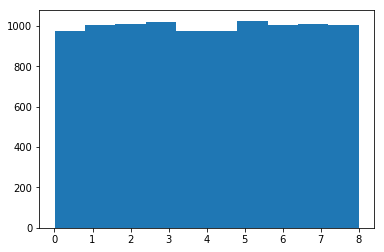

In [8]:
cont = ContinuousRandomVariable(0,8)
plt.hist(cont.draw(10000))

'uniform probability of drawing each infinitesimal point'

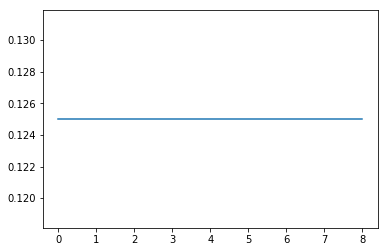

In [9]:
a=0.0
b=8.0
x = np.linspace(a,b,100)
y = [1/(b-a) for i in x]
plt.plot(x,y)
'uniform probability of drawing each infinitesimal point'

In [10]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean=0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = 'Normal'
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        
    def draw(self, numberOfSamples):
        print(self.mean)
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

0


(array([  2.,   1.,   1.,   3.,   8.,  11.,  10.,  24.,  37.,  51.,  66.,
         99., 123., 152., 186., 234., 291., 333., 393., 461., 527., 568.,
        637., 614., 613., 621., 589., 513., 525., 460., 371., 334., 273.,
        239., 157., 117., 114.,  63.,  47.,  45.,  36.,  11.,  20.,  10.,
          2.,   5.,   1.,   0.,   1.,   1.]),
 array([-64.99708378, -62.32548925, -59.65389472, -56.9823002 ,
        -54.31070567, -51.63911114, -48.96751661, -46.29592208,
        -43.62432755, -40.95273302, -38.28113849, -35.60954396,
        -32.93794943, -30.2663549 , -27.59476037, -24.92316585,
        -22.25157132, -19.57997679, -16.90838226, -14.23678773,
        -11.5651932 ,  -8.89359867,  -6.22200414,  -3.55040961,
         -0.87881508,   1.79277945,   4.46437398,   7.1359685 ,
          9.80756303,  12.47915756,  15.15075209,  17.82234662,
         20.49394115,  23.16553568,  25.83713021,  28.50872474,
         31.18031927,  33.8519138 ,  36.52350833,  39.19510285,
         41.866697

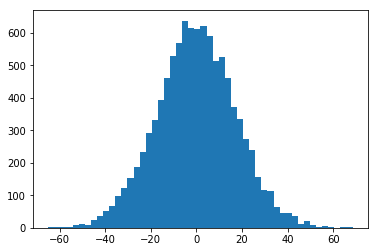

In [11]:
norm = NormalRandomVariable(0, 300)

plt.hist(norm.draw(10000), bins=50)

(array([  74.,  385., 1230., 3423., 2382., 1485.,  882.,  117.,   16.,
           6.]),
 array([ 3. ,  5.3,  7.6,  9.9, 12.2, 14.5, 16.8, 19.1, 21.4, 23.7, 26. ]),
 <a list of 10 Patch objects>)

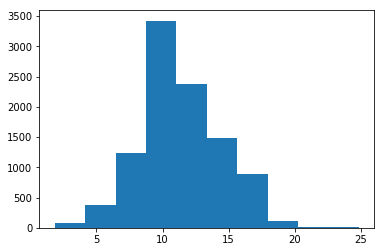

In [12]:
n=50
p=0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p)/ np.sqrt(n*p*(1-p))

plt.hist(X_samples, align = 'left')

(array([  74.,  385., 1230., 3423., 2382., 1485.,  882.,  117.,   16.,
           6.]),
 array([-3.10268701, -2.35151015, -1.6003333 , -0.84915644, -0.09797959,
         0.65319726,  1.40437412,  2.15555097,  2.90672783,  3.65790468,
         4.40908154]),
 <a list of 10 Patch objects>)

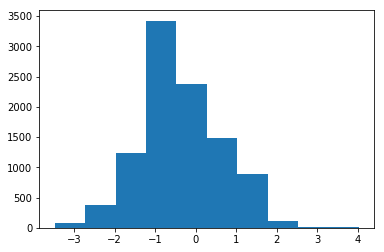

In [13]:
plt.hist(Z_samples, align='left')

0


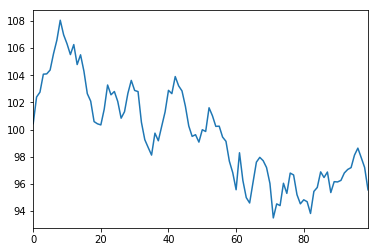

In [14]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100)
Y = pd.Series(np.cumsum(Y_returns), name = 'Y')+ Y_initial
Y.plot()

0


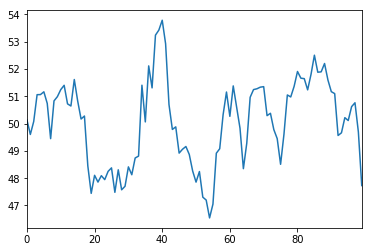

In [15]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns), name = 'Z')+ Z_initial
Z.plot()

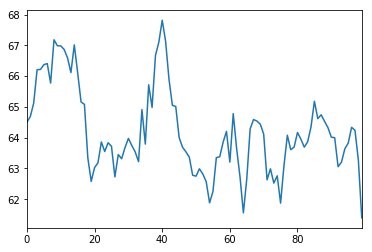

In [16]:
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1-Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns

W = pd.Series(np.cumsum(W_returns)) + W_initial

W.plot()

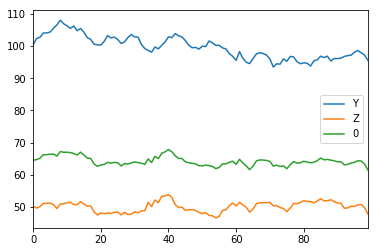

In [17]:
pd.concat([Y, Z, W], axis=1).plot()

(array([ 2.,  5., 12.,  8., 29., 20., 11.,  6.,  2.,  5.]),
 array([-1.87499378, -1.49473857, -1.11448335, -0.73422813, -0.35397292,
         0.0262823 ,  0.40653751,  0.78679273,  1.16704795,  1.54730316,
         1.92755838]),
 <a list of 10 Patch objects>)

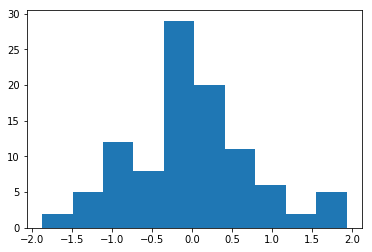

In [18]:
plt.hist(W_returns)

In [19]:
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

In [20]:
prices = pdr.data.DataReader('TSLA', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
returns = prices.pct_change()[1:]

_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)

print(p_value, skewness, kurtosis)

'p_value < 0.05, so reject the null hypothesis that returns are normally distributed'

2.855173998750306e-12 0.2047548171681345 5.21713573391861


'p_value < 0.05, so reject the null hypothesis that returns are normally distributed'

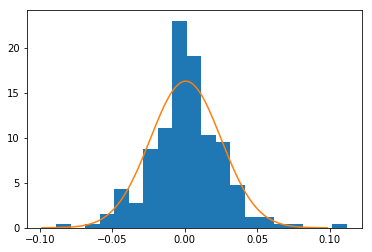

In [31]:
#assuming returns are normally distributed
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))

sample_distribution = stats.norm(sample_mean, sample_std_dev).pdf(x)
#sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * np.exp(-(x - sample_mean)*(x-sample_mean)/(2*sample_std_dev*sample_std_dev)))

plt.hist(returns, bins = 20, density=True)
plt.plot(x, sample_distribution)